<a href="https://colab.research.google.com/github/Ranjitghadge/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Ranjit_G_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Problem Statement

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

### <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



###Attribute Information

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

### Importing Libraries

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go

import collections
from plotly.offline import init_notebook_mode, iplot
import random
from datetime import datetime
import time
import dateutil

from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

%matplotlib inline



###Reading The Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import data
df=pd.read_csv("/content/drive/MyDrive/Data Science/Almabetter/Colab Notebooks/Netflix Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#Display column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df.shape

(7787, 12)

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


###Data Cleaning

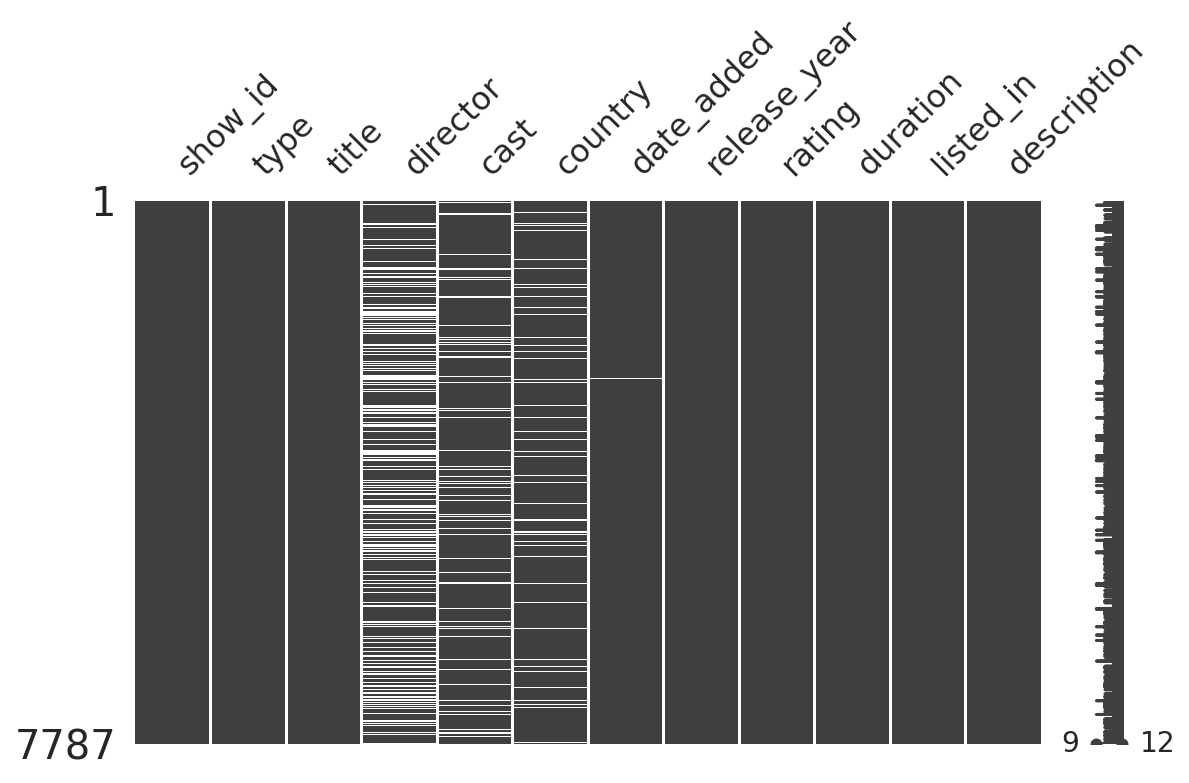

In [ ]:
#Plot the null values 
import missingno as msno
msno.matrix(df,figsize=[9,5])

In [ ]:
#Dropping irrelevent features 
df.drop(['director','cast'],axis=1, inplace=True)

In [ ]:
#Value counts of type feature
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [ ]:
#Looking nan values on data_added 
df[df['date_added'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
#Removing nan values
df = df[df['date_added'].notna()]
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_added'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    2020
1    2016
2    2018
3    2017
4    2020
Name: year_added, dtype: object

In [ ]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [ ]:
#df['director'].fillna('No Director',inplace=True)
#df['cast'].fillna('No Cast',inplace=True)
#df['country'].fillna('Country Unavailable', inplace=True)
#df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
# Recheck presence of nulls
df.isnull().sum()

show_id           0
type              0
title             0
country         506
date_added        0
release_year      0
rating            7
duration          0
listed_in         0
description       0
year_added        0
dtype: int64

###EDA


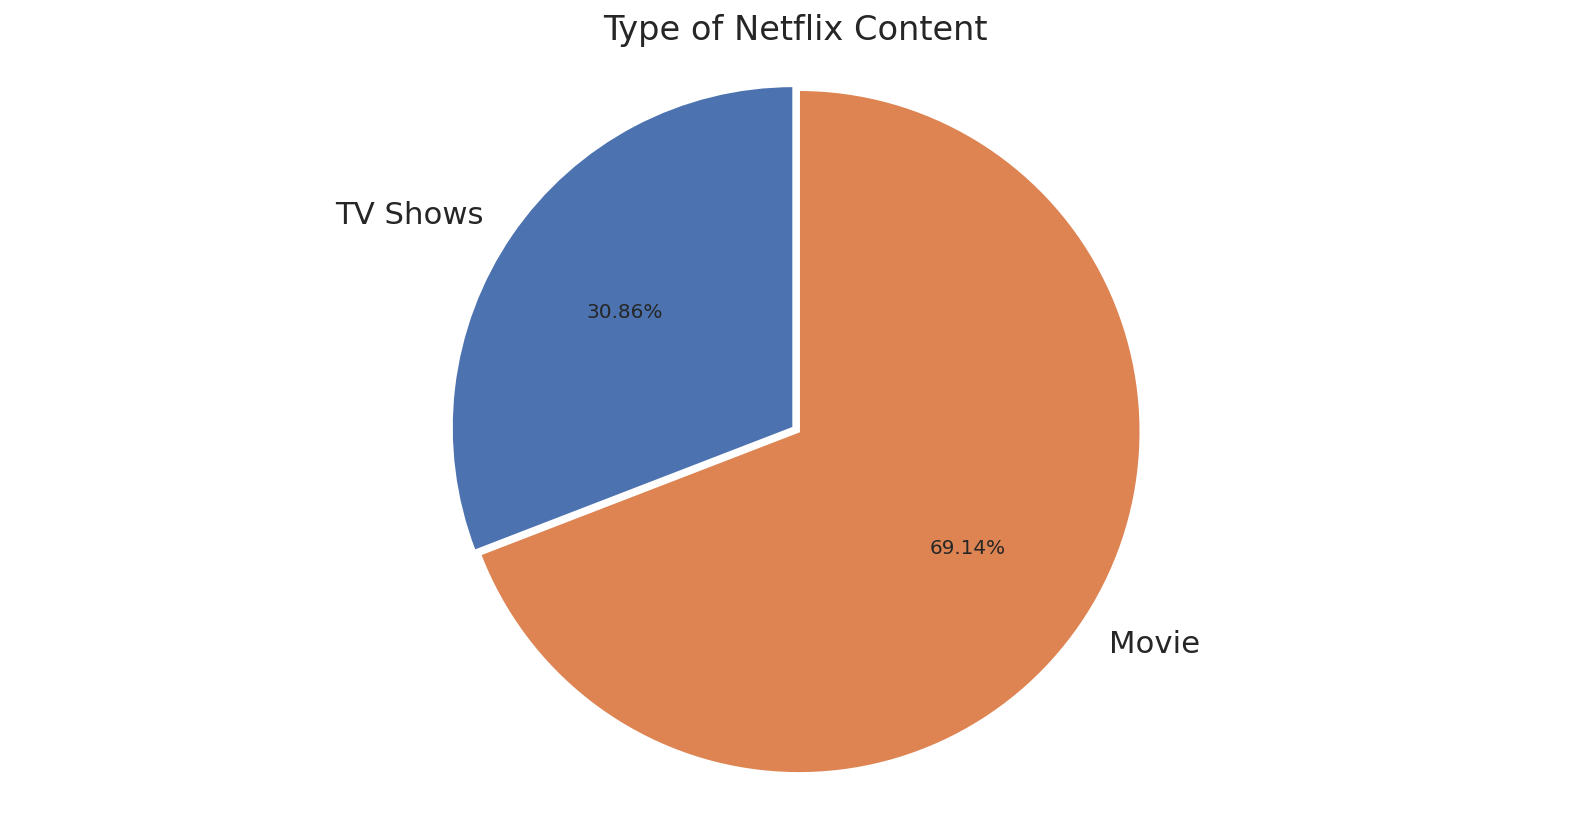

In [ ]:
#Plotting a pie chart.
import matplotlib.pyplot as plt
import numpy as np
# Creating plot
plt.figure(figsize =(14, 7))
labels=['TV Shows','Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.01,0.01],
        autopct='%1.2f%%', startangle=90)
# show plot
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

Production based on type of content & release year.

In [ ]:
#Create dataframe for TV Shows & Movie
yearwise_movies= df[df.type=='TV Movies']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearwise_shows= df[df.type=='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=df['release_year'].value_counts().sort_index(ascending=False).head(15)

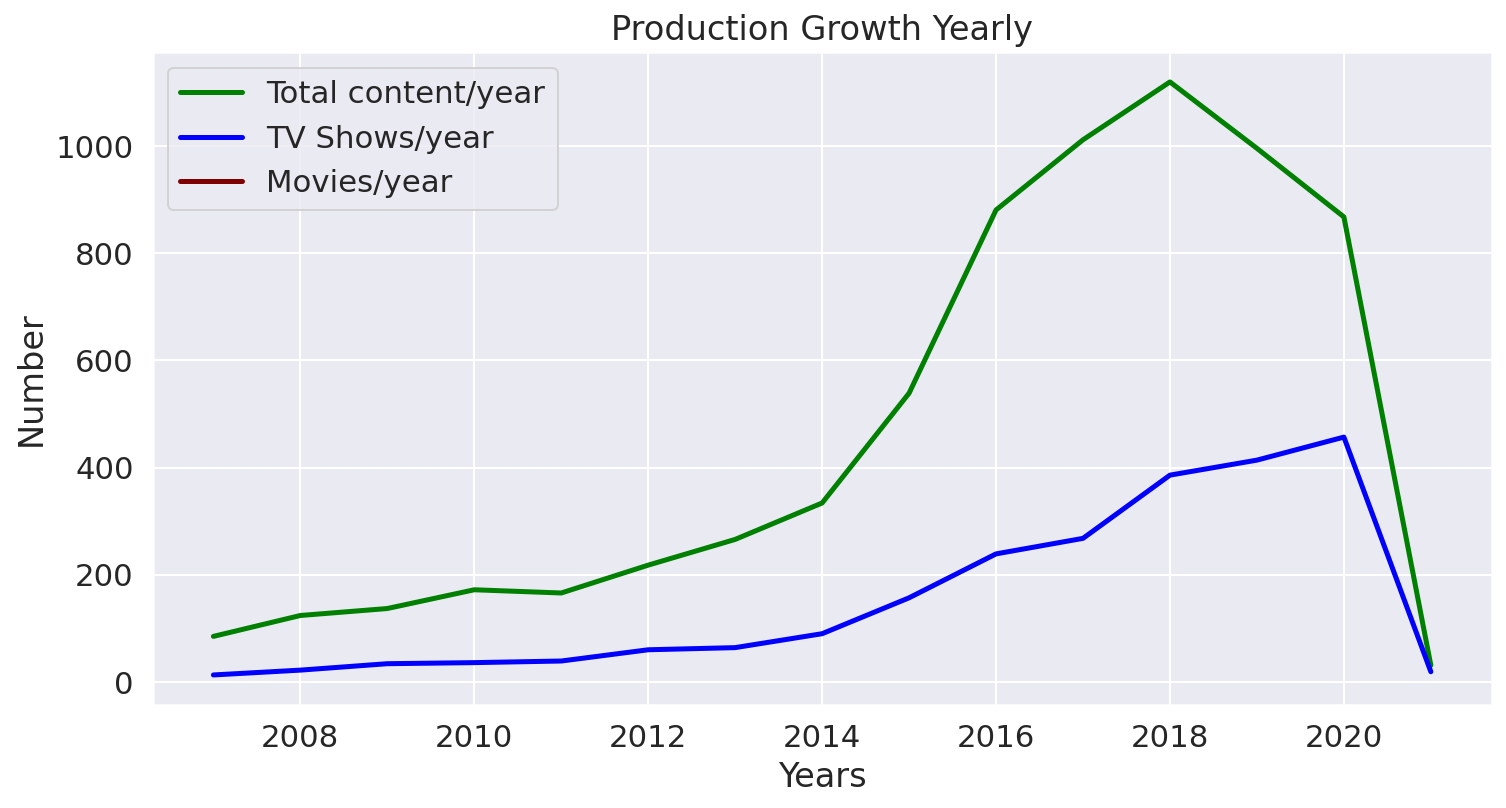

In [ ]:
#Plot the number of movies across years
sns.set(font_scale=1.4)
total_content.plot(figsize=(12,6),linewidth=2.5,color='green',label="Total content/year")
yearwise_shows.plot(figsize=(12,6),linewidth=2.5,color='blue',label="TV Shows/year")
yearwise_movies.plot(figsize=(12,6),linewidth=2.5, color='maroon',label="Movies/year")

plt.xlabel("Years")
plt.ylabel("Number")
plt.legend()

plt.title('Production Growth Yearly')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

Release year

In [ ]:
df.release_year.unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [ ]:
df['release_year'].value_counts().to_frame()

,release_year
2018,1120
2017,1012
2019,996
2016,881
2020,868
...,...
1925,1
1964,1
1966,1
1947,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



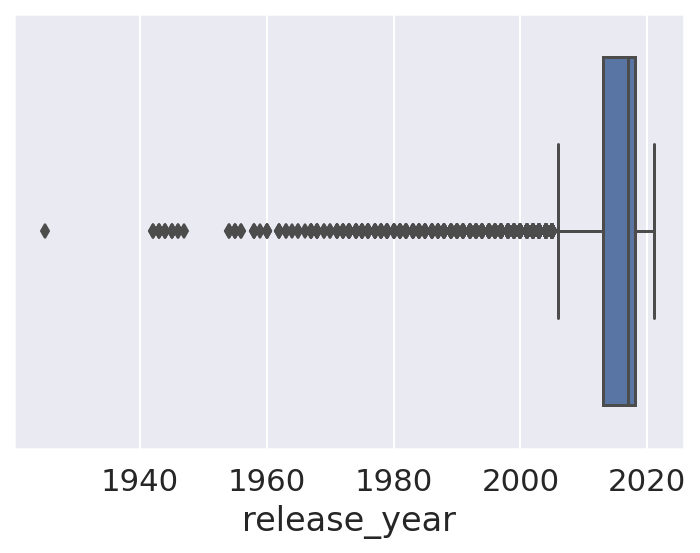

In [ ]:
#Box Plot
sns.boxplot(df.release_year)

In [ ]:
#Find out IQR for release year

release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')


release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


In [ ]:
release_year_outliers = df[(df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) |
                           ( df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]

In [ ]:
np.percentile(df["release_year"],1)

1974.0

In [ ]:
#replacing outliers with means
df["release_year"] = np.where(df["release_year"] <2010, df.release_year.mean(),df['release_year'])

In [ ]:
df.release_year.describe()


count    7777.000000
mean     2016.347798
std         2.567975
min      2010.000000
25%      2013.935965
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



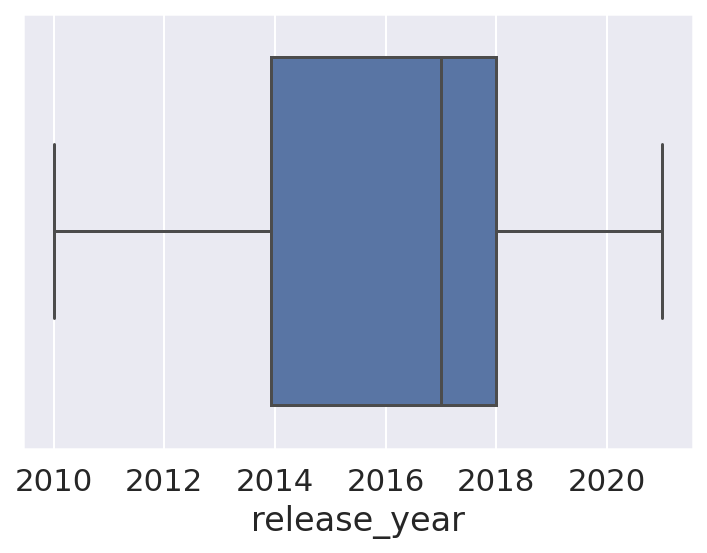

In [ ]:
#Box plot
sns.boxplot(df.release_year)

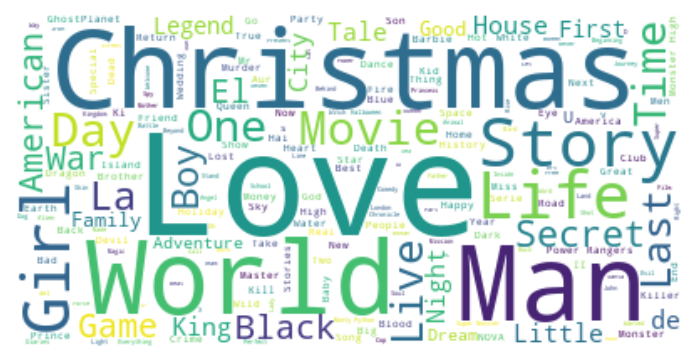

In [ ]:
#subsetting df
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Relaese years of Movies

Country VS Rating

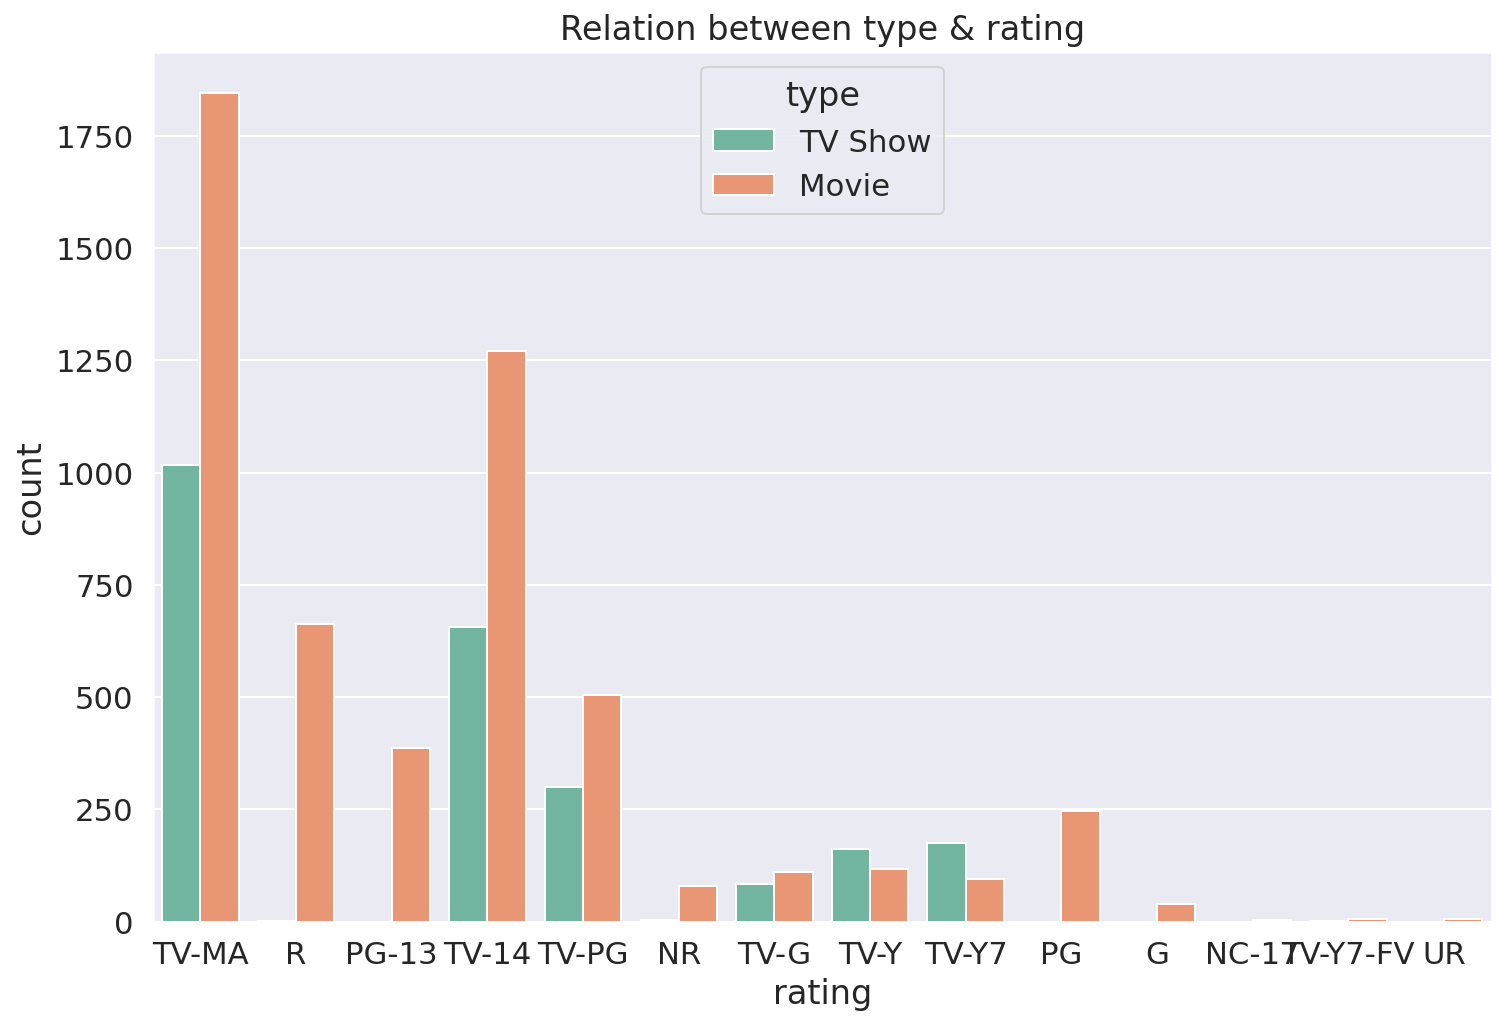

In [ ]:
#Graph of diffrenet rating on movies & TV shows
plt.figure(figsize=(12,8))
sns.countplot(x='rating',hue='type',data=df,palette="Set2")
plt.title('Relation between type & rating')
plt.show()

Most of movies & tv shows having high rating of Mature Audience

Content of countries

In [ ]:
df['country'].value_counts().head(10)

United States     2549
India              923
United Kingdom     396
Japan              225
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: country, dtype: int64

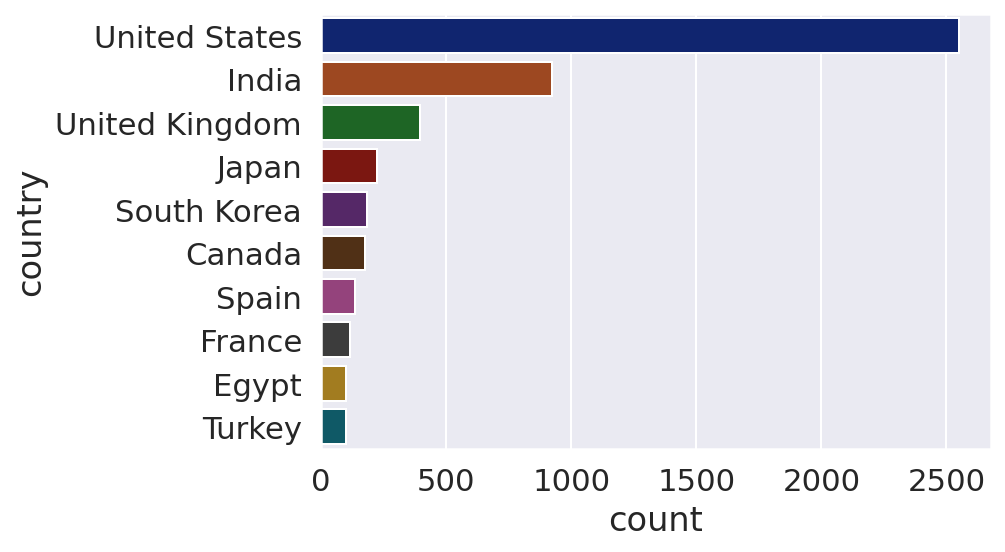

In [ ]:
#Countplot of country
sns.countplot(y='country',data = df,palette='dark',order=df['country'].value_counts().index[0:10] )

United States & India are top two countries having most of content.

Content added monthwise

In [ ]:
df['month']=df['date_added'].str.split(' ').str[0]
df['month']

0          August
1        December
2        December
3        November
4         January
          ...    
7782      October
7783        March
7784    September
7785      October
7786        March
Name: month, Length: 7777, dtype: object

In [ ]:
month_df=df['month'].value_counts().reset_index()
month_df.rename(columns={'index':'Month_Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
ten_counts=month_df.loc[0:10]
ten_counts

,Month_Name,Count
0,December,817
1,October,780
2,January,746
3,November,730
4,March,661
5,September,614
6,August,612
7,April,596
8,July,592
9,June,538


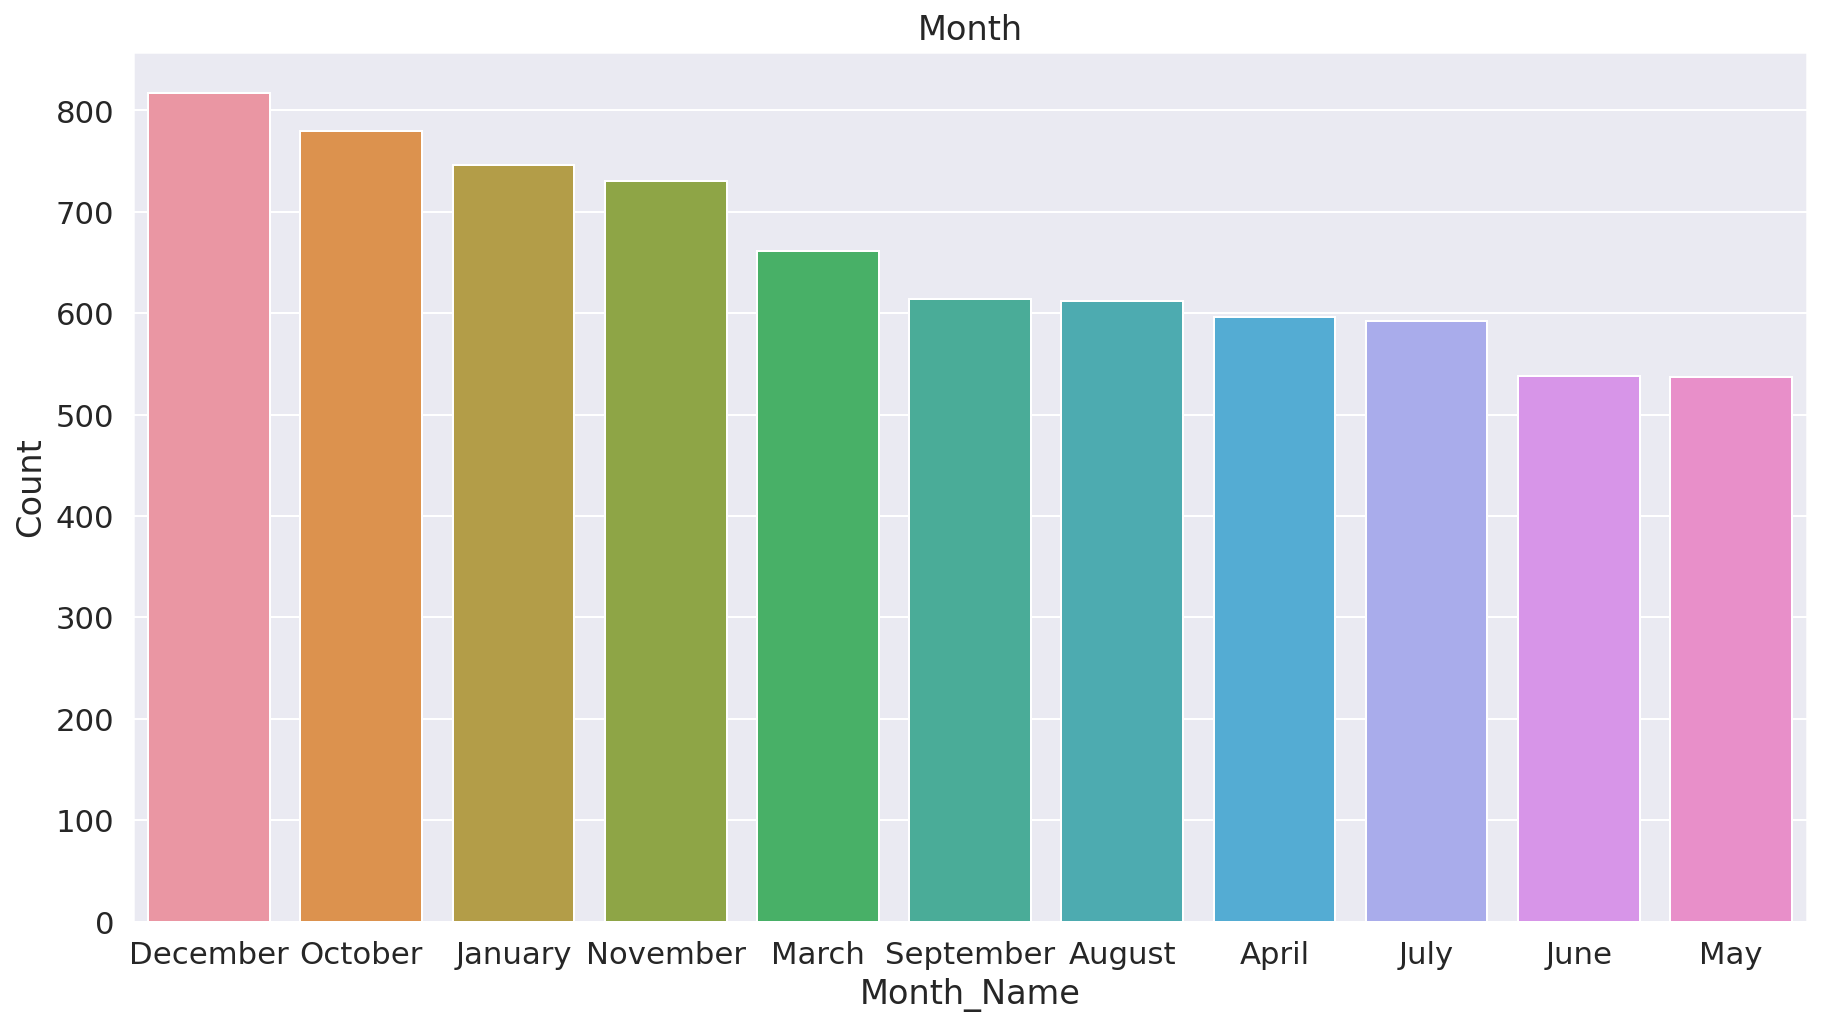

In [ ]:
#monthwise content
plt.figure(figsize=(15,8))
plt.title('Month')
sns.barplot(x='Month_Name', y='Count',data=ten_counts)

###Data preprocessing

In [ ]:
df['description'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [ ]:
df.shape

(7777, 12)

In [ ]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

Removing Punctuations

In [ ]:
def remove_punctuation(description):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return description.translate(translator)

In [ ]:
df['description'] = df['description'].apply(remove_punctuation)
df.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020.0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016.0,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December


Removing Stopwords

In [ ]:
#Extracting the stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Extracting stopwords from nltk library
sw = stopwords.words('english')
# Displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [ ]:
#Function to remove stop words
def stopwords(description):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in description.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(description)

In [ ]:

df['description'] = df['description'].apply(stopwords)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020.000000,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",I n a f u t u r e w h e r e t h e e ...,2020,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016.000000,TV-MA,93 min,"Dramas, International Movies",A f t e r a d e v a s t a t i n g e a r ...,2016,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011.000000,R,78 min,"Horror Movies, International Movies",W h e n a n a r m y r e c r u i t i s ...,2018,December
3,s4,Movie,9,United States,"November 16, 2017",2013.935965,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",I n a p o s t a p o c a l y p t i c w o ...,2017,November
4,s5,Movie,21,United States,"January 1, 2020",2013.935965,PG-13,123 min,Dramas,A b r i l l i a n t g r o u p o f s t ...,2020,January


**Top words before stemming.**

Collect vocabulary count

In [ ]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words="english")

# fit the vectorizer using the text data
tfid_vectorizer.fit(df['description'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

ValueError: ignored

Store the colab & counts in Pandas dataframe

In [ ]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [ ]:
vocab_bef_stem

In [ ]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (19550, 19600))

**A funtion to carry out stemming operation**

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

**Apply the function to each examples**

In [ ]:
df['description'] = df['description'].apply(stemming)
df.head(2)

## **Top words after stemming operation**

**Collect vocabulary count**

In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words="english")

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['description'])

# Collect the vocabulary items used in the vectorizer
dictionary_listed_in = tfid_vectorizer.vocabulary_.items()

**Bar plot of top words after stemming**

In [ ]:
# Lists to store the vocab and counts
vocab = []
count = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary_listed_in:
    vocab.append(key)
    count.append(value)
# Store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# Sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# Plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10))

A function to return the length of text

In [ ]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [ ]:
df['length_listed'] = df['listed_in'].apply(length)
df.head()

## **Histogram of text length of each writer**

# **Top words of each writer and their count**

# **TF-IDF Extraction**


#**Applying Silhouette Score Method**

**Calculation of Silhouette score**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
X_features_rec_mon=df[['length','length_listed']]
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

### Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

* ### Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
* ### Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

### The Silhouette Coefficient for a sample is $ S = \frac{(b - a)}{max(a, b)}$.

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#**KMeans clustering**
**Applying Elbow Method**


In [ ]:
X_features_rec_mon=df[['length','length_listed']]
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

In [ ]:
plt.figure(figsize=(15,10))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

#**Dendogram to find the optimal number of clusters**

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold**

**No. of Cluster = 3**

**Agglomerative hierarchical Clustering**

In [ ]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')

plt.title('Clusters of content')

plt.legend()
plt.show()

**By applying different clustering algorithem to our dataset .we get the optimal number of cluster is equal to 3**

#**Conclusion**



1.   Data set contains 7787 rows and 12 columns in that cast and director features contains large number of missing values so we can drop it and we have 10 features for the further implementation 
2.   We have two types of content TV shows and Movies (30.86% contains TV shows and 69.14% contains Movies)

3.   By analysing the content added over years we get to know that in recent years netflix is focusing movies than TV shows (movies is increased by 80% and TV shows is increased by 73% compare to 2016 data)

4.   The most number of the movies and TV shows release in 2017 and 2020 respectively and united nation have the maximum content on netflix 

5.   On Netflix, Dramas genre contains the maximum content among all of the genres and the most of the content added in december month and less content in february 

6.   By applying the silhouette score method for n range clusters on dataset we got best score which is 0.348 for 3 clusters it means content explained well on their own clusters, by using elbow method after k = 3 curve gets linear it means k = 3 will be the best cluster

7.   Applied different clustering models Kmeans, hierarchical, Agglomerative clustering  on data we got the best cluster arrangments 

8.   By applying different clustering algorithms to our dataset .we get the optimal number of cluster is equal to 3












